<a href="https://www.kaggle.com/code/hongkaisabot/predicting-gpa?scriptVersionId=184825818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
stu_data = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')

## Exploring The DataFrame

In [3]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
stu_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
stu_data.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
stu_data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Exploratory Data Analysis

In [7]:
stu_eda = stu_data.copy()

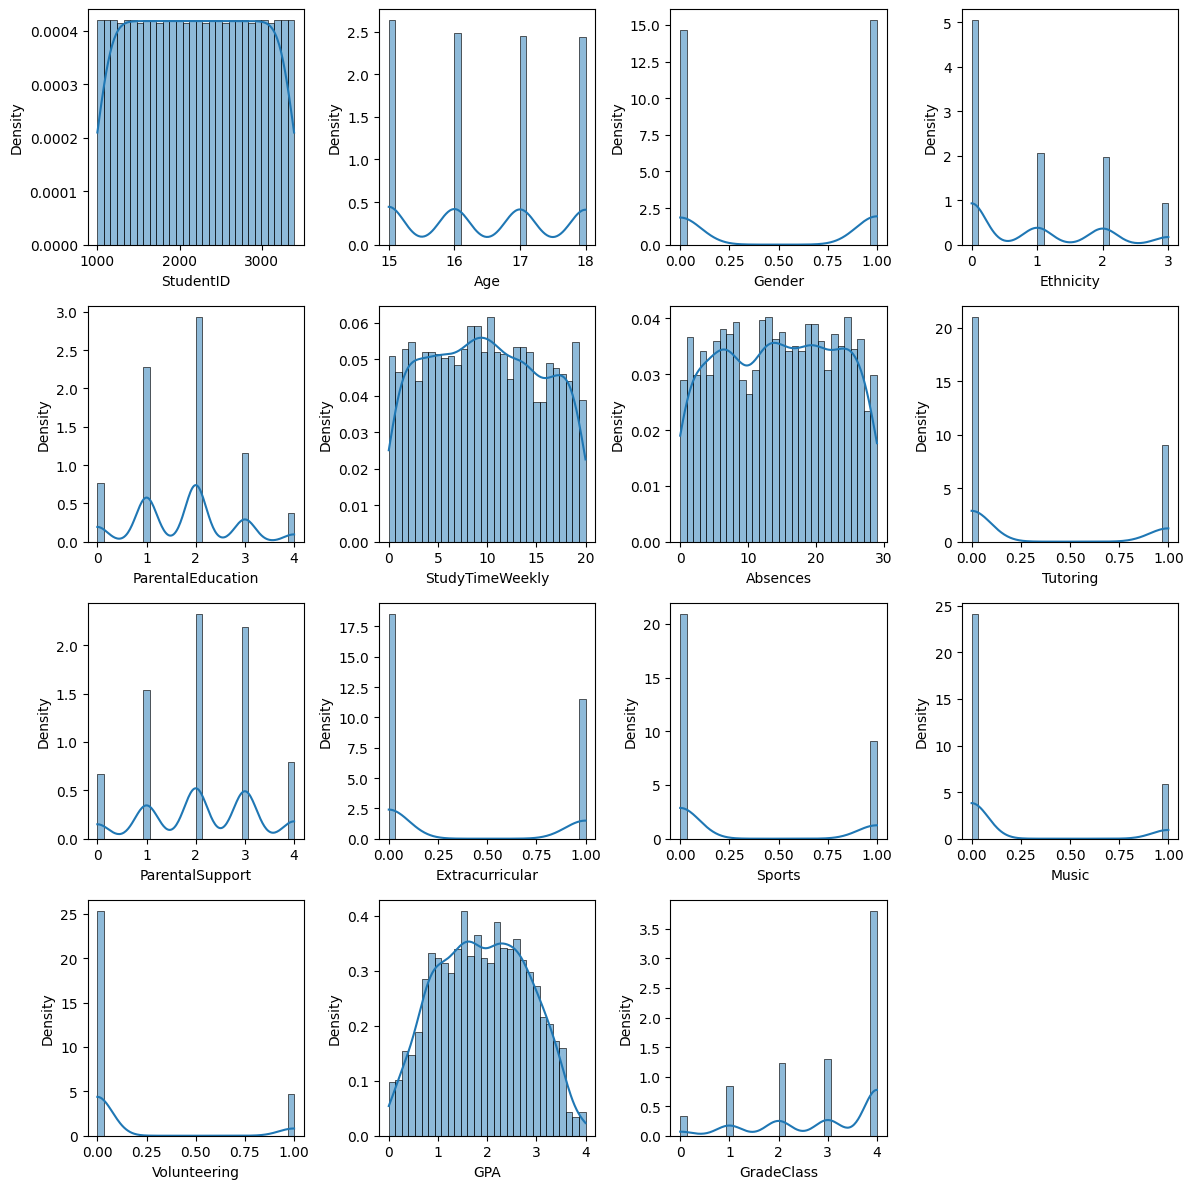

In [8]:
num_cols_eda = stu_eda.columns

fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(stu_eda[col],kde=True,stat='density',bins=30,ax=ax[i])

for i in range(len(num_cols_eda),16):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

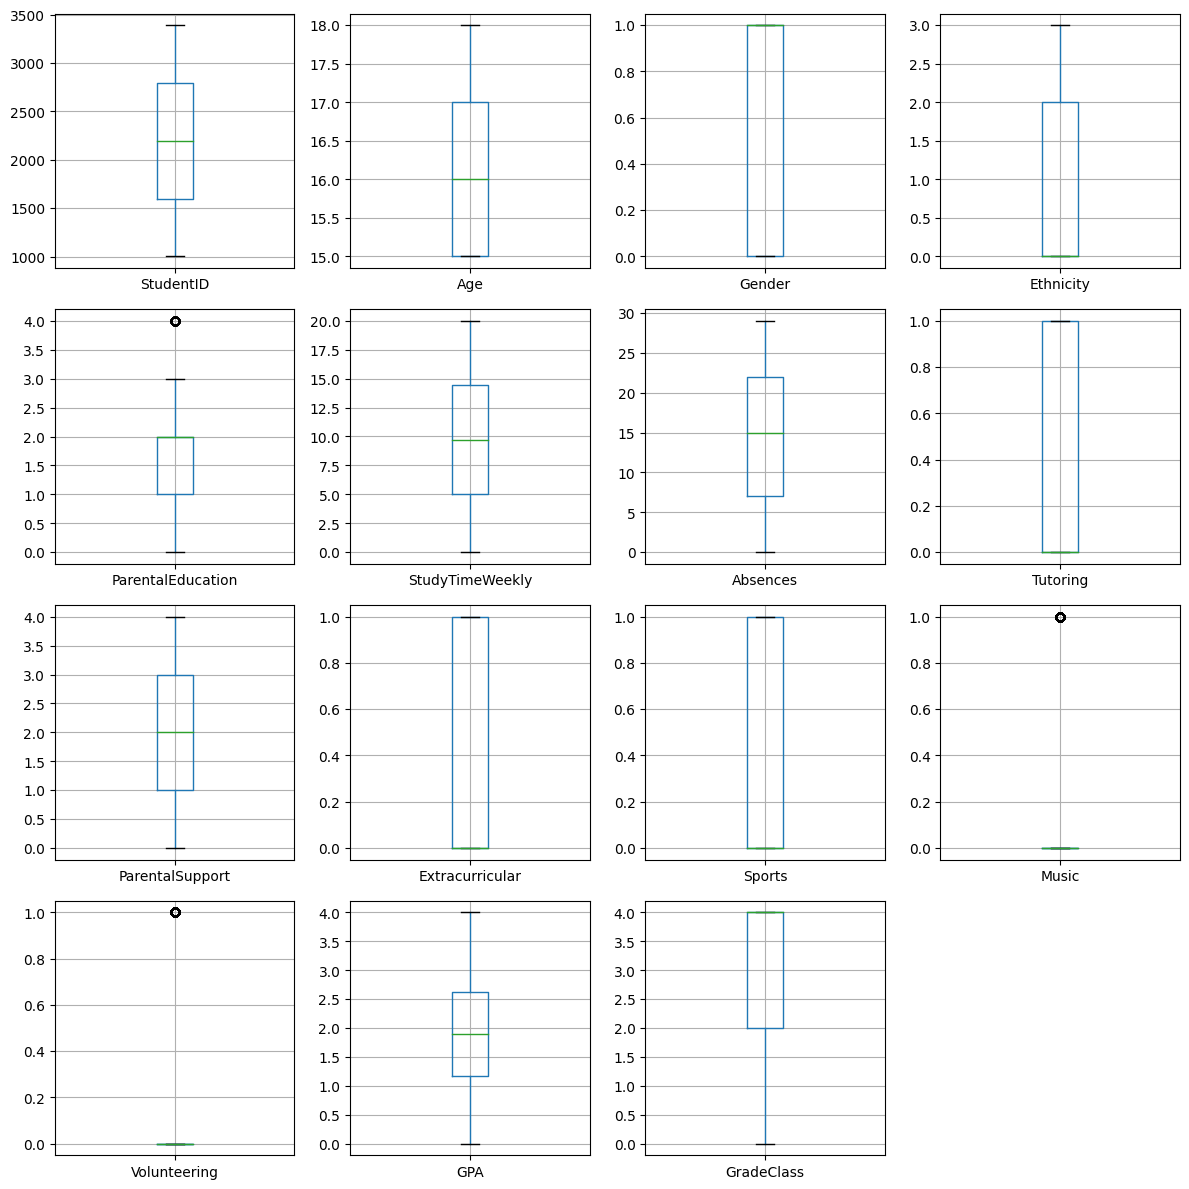

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    stu_eda.boxplot(col, ax=ax[i])

for i in range(len(num_cols_eda),16):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

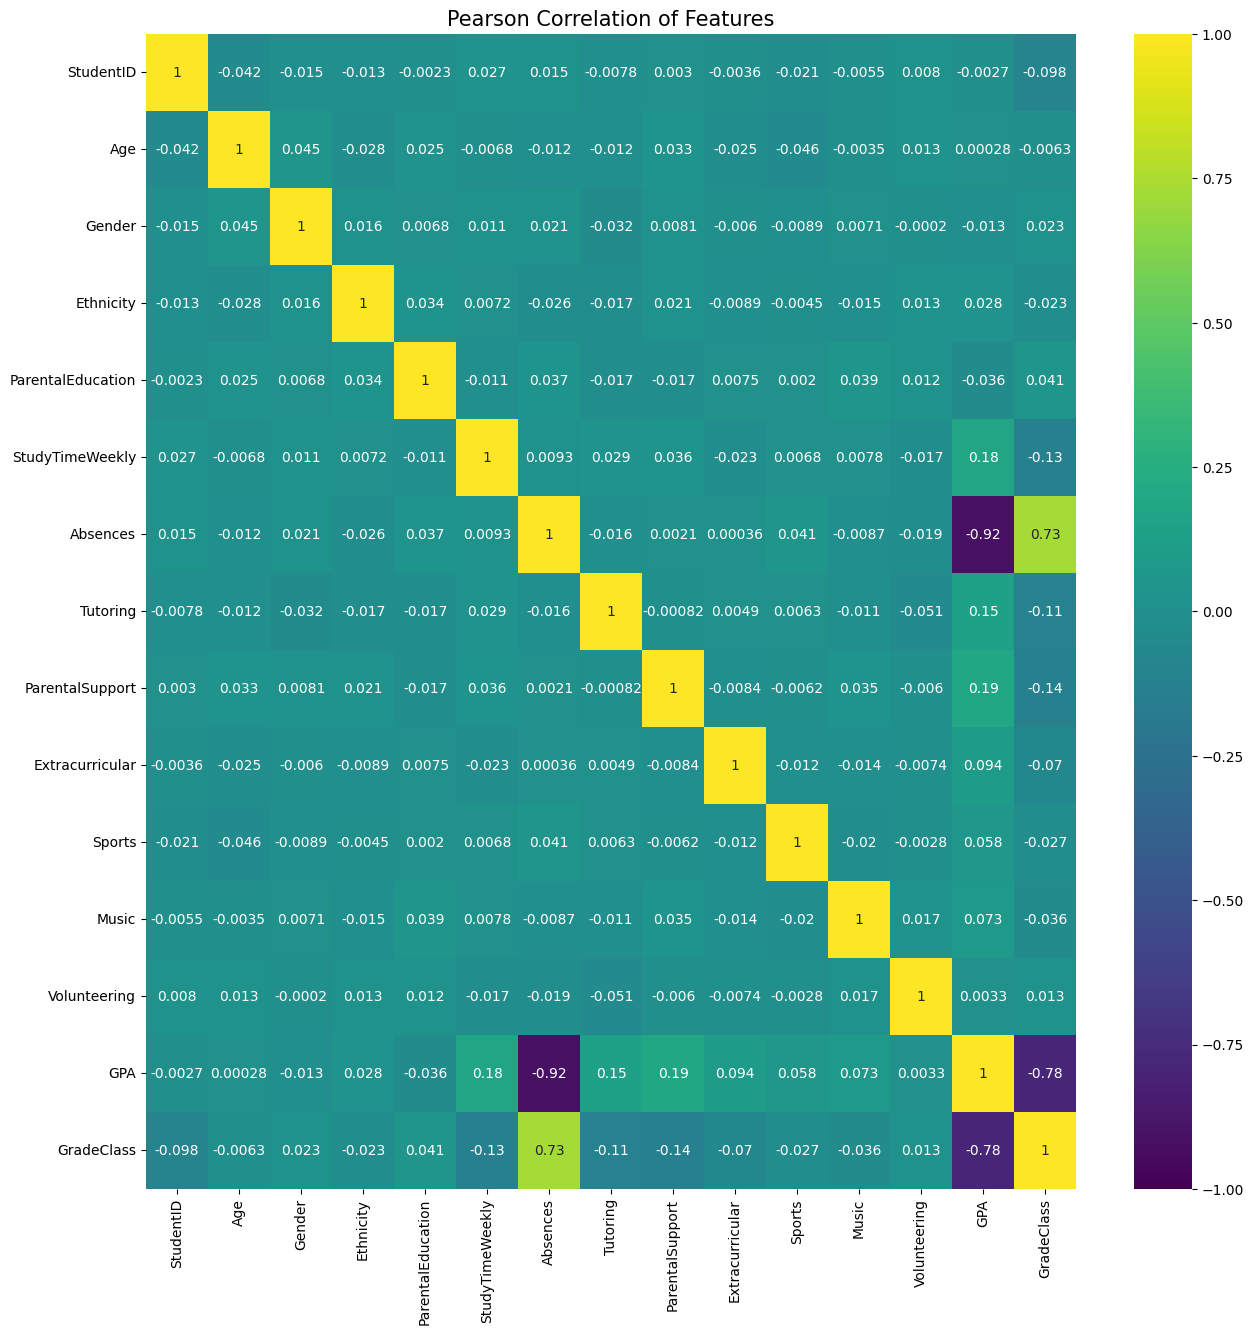

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(stu_eda[num_cols_eda].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

## Data Preprocessing

In [11]:
stu_data = stu_data.drop(columns=['StudentID','GradeClass'])

In [12]:
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

stu_data['Ethnicity'] = stu_data['Ethnicity'].map(ethnicity_mapping)

In [13]:
stu_data['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American', 'Other'], dtype=object)

In [14]:
stu_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,Caucasian,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,Caucasian,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,Asian,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,Caucasian,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,Caucasian,2,4.672495,17,1,3,0,0,0,0,1.288061


## Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    stu_data.drop('GPA', axis=1), stu_data['GPA'], test_size=0.3, random_state=69)

X_train.shape, X_test.shape

((1674, 12), (718, 12))

In [16]:
y_train.shape, y_test.shape

((1674,), (718,))

## One-Hot Encoding

In [17]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['Ethnicity'], 
    drop_last=False)
ohe_enc.fit(X_train)

OneHotEncoder(variables=['Ethnicity'])

In [18]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [19]:
X_train.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,Ethnicity_Caucasian,Ethnicity_Asian,Ethnicity_African American,Ethnicity_Other
2066,18,0,1,13.972712,25,0,3,1,0,0,0,1,0,0,0
465,17,0,2,6.653804,13,0,2,1,1,0,0,1,0,0,0
1757,15,1,3,13.352034,2,0,2,0,0,1,0,0,1,0,0
1902,15,0,1,14.452234,3,1,3,1,0,0,0,1,0,0,0
1321,17,1,1,11.112343,11,0,3,0,0,0,0,0,0,1,0


In [20]:
X_test.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,Ethnicity_Caucasian,Ethnicity_Asian,Ethnicity_African American,Ethnicity_Other
192,15,0,1,3.781553,9,0,2,1,0,0,0,0,0,1,0
1083,18,0,1,15.870748,22,0,3,0,0,1,0,0,1,0,0
1171,17,1,2,0.656510,8,0,4,0,0,1,0,1,0,0,0
1846,18,1,2,9.699846,11,0,3,1,0,0,1,0,1,0,0
321,15,1,1,17.006354,11,0,4,1,0,0,0,1,0,0,0


## Feature Scaling

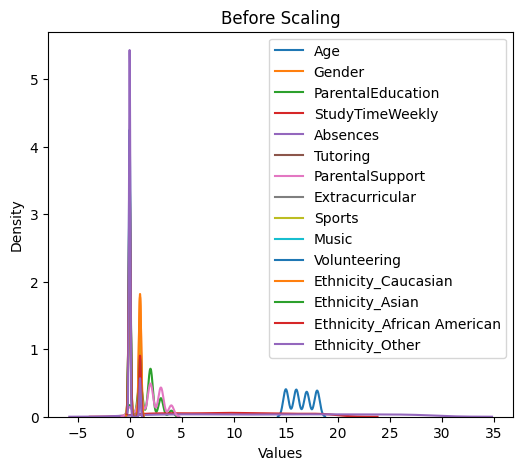

In [21]:
plt.figure(figsize=(6, 5))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

In [22]:
scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

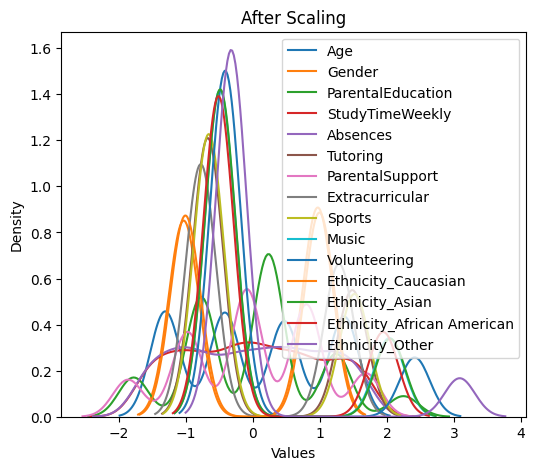

In [23]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

In [24]:
X_train.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,Ethnicity_Caucasian,Ethnicity_Asian,Ethnicity_African American,Ethnicity_Other
2066,1.360506,-1.032796,-0.772575,0.739025,1.229219,-0.674083,0.797710,1.285664,-0.659126,-0.490835,-0.414063,0.992857,-0.488022,-0.514150,-0.323961
465,0.470862,-1.032796,0.233877,-0.561882,-0.179610,-0.674083,-0.088988,1.285664,1.517160,-0.490835,-0.414063,0.992857,-0.488022,-0.514150,-0.323961
1757,-1.308424,0.968246,1.240329,0.628702,-1.471037,-0.674083,-0.088988,-0.777808,-0.659126,2.037344,-0.414063,-1.007194,2.049087,-0.514150,-0.323961
1902,-1.308424,-1.032796,-0.772575,0.824258,-1.353635,1.483497,0.797710,1.285664,-0.659126,-0.490835,-0.414063,0.992857,-0.488022,-0.514150,-0.323961
1321,0.470862,0.968246,-0.772575,0.230606,-0.414415,-0.674083,0.797710,-0.777808,-0.659126,-0.490835,-0.414063,-1.007194,-0.488022,1.944957,-0.323961


## Building Models (Linear & Random Forest)

In [25]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))
print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 0.03706140556088915 
 test_mse: 0.04216384778443351
train_r-sq: 0.9566522661301449 
 test_r-sq: 0.9470001280416793


In [26]:
rfr = RandomForestRegressor(random_state=69)
rfr.fit(X_train, y_train)
print('train_mse:', mean_squared_error(y_train, rfr.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, rfr.predict(X_test)))
print('train_r-sq:', r2_score(y_train,rfr.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, rfr.predict(X_test)))

train_mse: 0.008093434719233506 
 test_mse: 0.05583257661717216
train_r-sq: 0.9905337628459344 
 test_r-sq: 0.9298185633592546


## Conclusion

While the random forest regressor shows superior performance on the training set, it does not generalize as well as the linear regression model to the test set. The linear regression model, with slightly lower performance on the training data, proves to be more robust in terms of generalization. 